# Music Genre Classification with GTZAN Dataset
## Audio Files | Mel Spectrograms | CSV with extracted features
Music Experts have been trying for a long time to understand sound and what differenciates one song from another. How to visualize sound. What makes a tone different from another.
This data hopefully can give the opportunity to do just that.<br>
In this Project we learn basic information about audio data, which are needed for using audio in Machine Learning and Deep Learning models.<br>

For more information about the dataset use the following Kaggle link:<br>
https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

## Import Libraries

In [1]:
# imoprt libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob # allows us to list all files to a directory
import IPython
import IPython.display as ipd # to play the Audio Files

import librosa # main package for working with Audio Data
import librosa.display

# Things we should know if we work with Audio Data

* ### Frequenzy (Hz)
Every Audio has some sort of Frequencies within it. We should know that Frequency:
    * describes differences of wave lenghts.
    * can be divided to Low- and High Frequency (Short Wavelenght and Long Wavelenght)

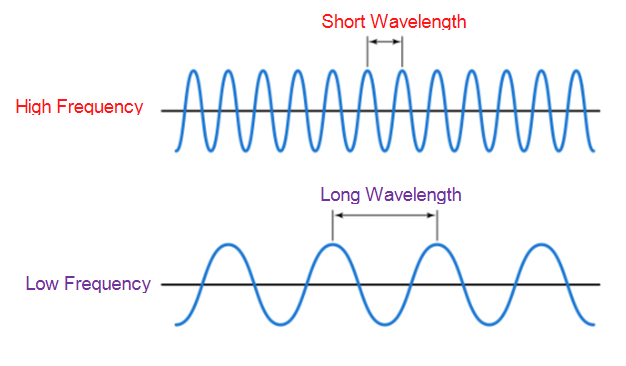

* ### Intensity (db / power) of Audio File
Shows how high each waves get for each Frequency itself, so it describes the change of loudness:
    * describes the amplitude (height) of the wave
    * is measured in db/power
    
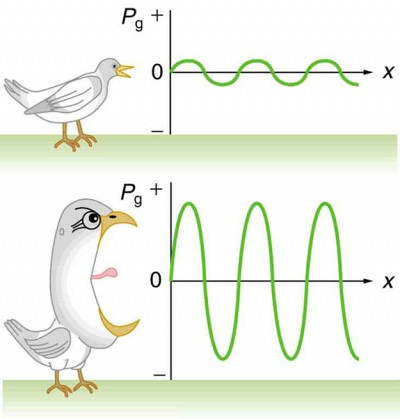

* ### Sample Rate
Sample Rate is how the Computer reads the audio file.
    * measures how frequent the samples of the audio files are
    * quality or detail of the audio file
    * high sample rate gets more details of each wave in the adio file than low sample rates
    * certain sample rates are, because our ears can hear most at this rate
    
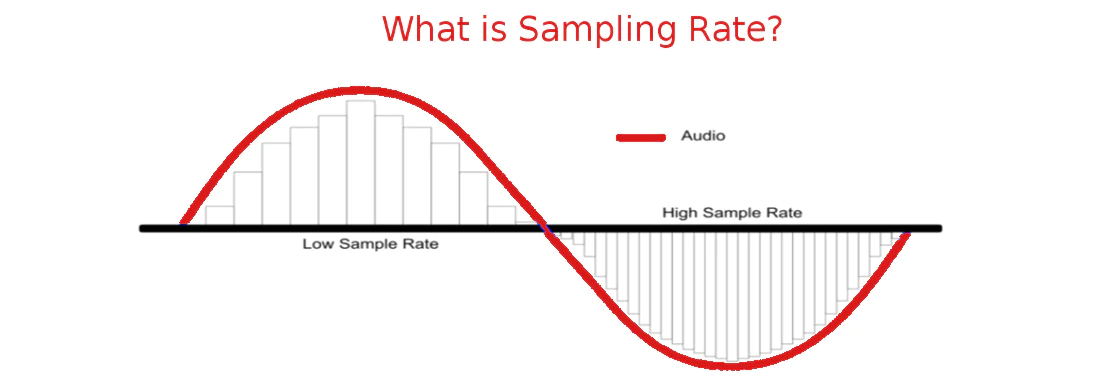

* ### Different Audio File Types
There are many types of audio files:
    * mp3, wav, flac...
    
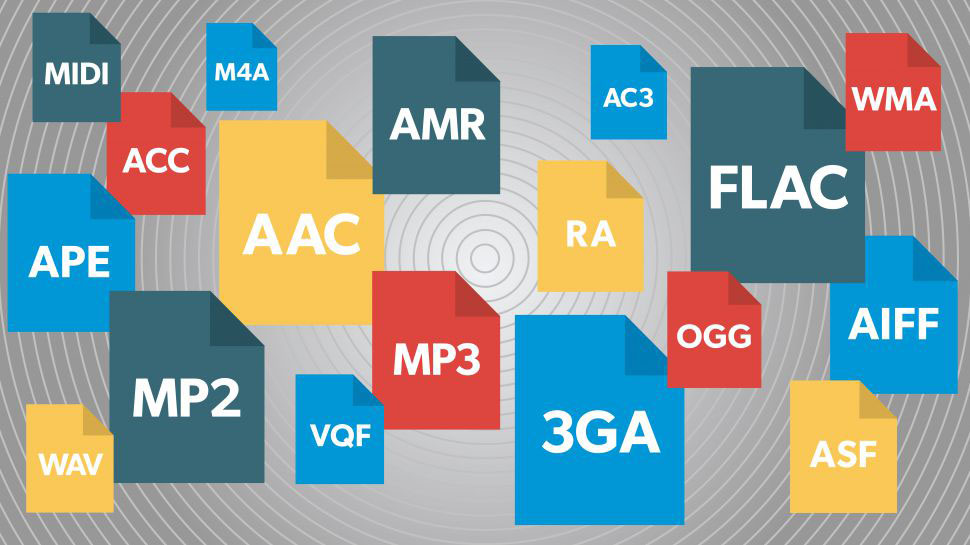

## Benefits of Librosa
* provides a helper function to convert multichannel to mono
* converts Sample Rate to 22050

## How to read the Audio Files
With using the package glob we can list out all files in the folders.

In [2]:
# Make a list of all the wav files in the dataset and store them in a variable
audio_files = glob("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/*/*.wav")

With using the '*' (stars) we can list all of the items in the dataset. It replaces the stars with any files that exist in the dataset.

## How to listen to the Audio Files
With using the IPhytons display module we can display the audio files. We get a player in the notebook where we can listen to the audio file. Note that we didn't actually didn't read in the file and can't manipulate it yet.

In [3]:
# Play the first Audio file
ipd.Audio(audio_files[0])

## How to load the Audio Files
Here we use librosa and its load() function to read the audio files. We save the ouutputs as 'y' and sr':<br>
* y:  raw data of the audio file (numpy array)
* sr: integer value of the sample rate

In [4]:
# load the audio file and show raw data and sample rate
y, sr = librosa.load(audio_files[0])
print("Y is a numpy array:", y)
print("Shape of Y:", y.shape)
print("Sample Rate:", sr)

Y is a numpy array: [-0.0196228  -0.00567627  0.00927734 ...  0.01547241  0.01220703
  0.0319519 ]
Shape of Y: (661794,)
Sample Rate: 22050


We can see that the raw data of our audiofiles (y) are numpy arrays and in this case our Sample Rate (sr) is 22050.

## How to plot the Audio files
One way to plot the raw audio data array is if we just turn it into a pandas series and use the plot() function.

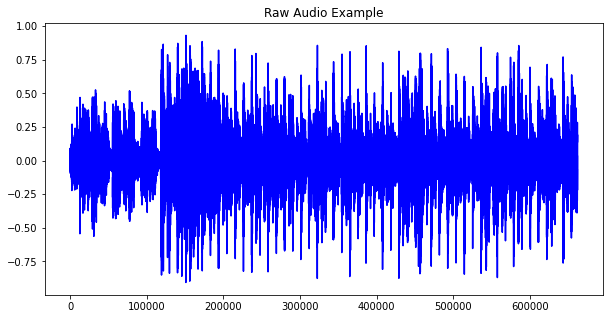

In [5]:
# turn raw data array to pd series and plot the audio example
pd.Series(y).plot(figsize=(10,5), title="Raw Audio Example", color='blue');

We can also use the display.waveshow() function of librosa.

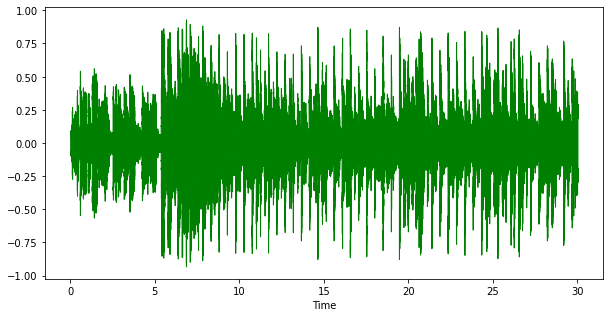

In [6]:
plt.figure(figsize=(10,5))
librosa.display.waveshow(y, color = "Green")
plt.show()

We want to take it to the next level by looking at the different frequencies by how powerful they are.<br>
We do this with applying a **Fourier transform** to the audio data. That allows us to extract out which frequencies are sounding at different parts in the audio file. We use the stft() function **(Short-time Fourier Transform)**.<br>
Than we apply the amplitude to db function to the output of STFT, which is a commonly used transform for audio data to convert amplitude values to decibel (db). <br>
With this we get data which we can feed to normal ML models.

In [7]:
# Use STFT on raw audio data
D = librosa.stft(y)
# convert from aplitude to decibel values by taking the absolute value of D in reference what the max value would be
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# see the shape of transformed data
print("New shape of transformed data", S_db.shape)

New shape of transformed data (1025, 1293)


## Plotting Audio File as a Spectogram
A spectrogram is a visual representation of the spectrum of frequencies in a sound or other signal as it varies with time. The resulting plot is a two-dimensional graph, with frequency on the vertical axis and time on the horizontal axis. Spectrograms are often used in the analysis and manipulation of audio signals, particularly in the fields of music, speech, and acoustics.

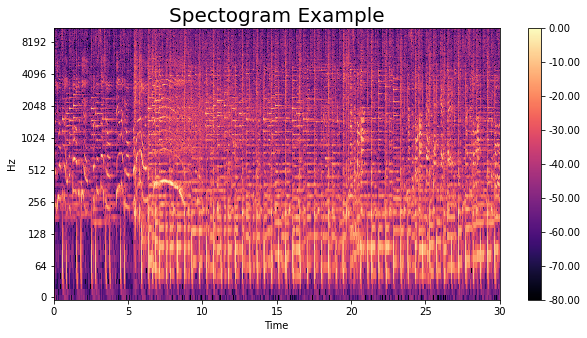

In [8]:
# plot transformed data as spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

## Create a Mel Spectrogram (Melodic Spectogram)
A Mel spectrogram is a type of spectrogram that represents the spectral content of a sound or signal on a scale that is based on the perceived pitch of the different frequencies. The Mel scale is a logarithmic scale that maps frequency to pitch in a way that is more closely related to how the human auditory system perceives pitch.

In [9]:
# apply mel spectogram without STFT
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128*2)
print("Shape of Mel Spectogram", S.shape)
# use that converting function as above
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Shape of Mel Spectogram (256, 1293)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.0196228  -0.00567627  0.00927734 ...  0.01547241  0.01220703
  0.0319519 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


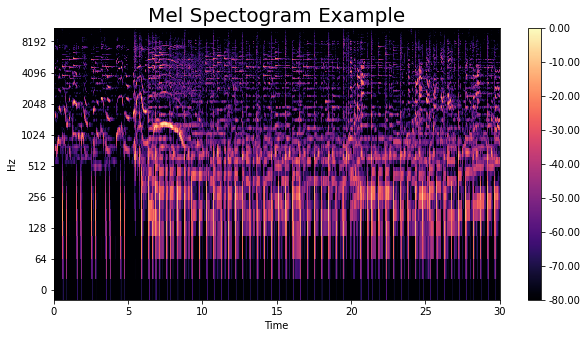

In [10]:
# plot the mel spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

## EDA - Exploratory Data Analysis


In [11]:
# load csv file
df = pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv")

In [12]:
df.head() # first 5 entries

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [13]:
df.shape # see the shape of df

(9990, 60)

In [14]:
df.info() # infos about the samples, features and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [15]:
df.isnull().sum() # checking for missing values

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

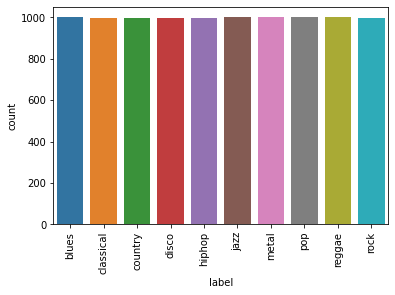

In [16]:
sns.countplot(x=df.label) # plot the categories
plt.xticks(rotation=90);

We have an even amount of all categories with 9990 samples

## Data Preproccesing
After dropping the filename column and assigning our x and y, we use the StandardScaler on our x values to standardize our data and the LabelEncoder for our labels. Then we split our data into train and test data.

In [17]:
# drop filename column and show new df first 5 entries
df = df.drop(labels='filename',axis=1)
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [18]:
# import labelencoder and scaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [19]:
data = df.iloc[:, :-1] # get the other columns
data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [20]:
labels = df.iloc[:, -1] # get labels column
labels.to_frame()

,label
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
9985,rock
9986,rock
9987,rock
9988,rock


## Getting x and y ready

In [21]:
# assign x and y, scale x and encode y
x = np.array(data, dtype = float)
x = scaler.fit_transform(data)
y = encoder.fit_transform(labels)
x.shape, y.shape

((9990, 58), (9990,))

In [22]:
# split data to train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6693, 58), (3297, 58), (6693,), (3297,))

## Modeling

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    
# create an instance of each classification algorithm
g=GaussianNB()
b=BernoulliNB()
KN=KNeighborsClassifier()
D=DecisionTreeClassifier()
XGB=XGBClassifier()

algos=[g,b,KN,D,XGB]
algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','XGBClassifier']
   
accuracy_scored=[]
    
# fit and predict for each Algo
for item in algos:
    item.fit(x_train,y_train)
    item.predict(x_test)
    accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))

In [34]:
# show results in a DataFrame
result = pd.DataFrame(accuracy_scored, columns=["Accuracy"])
result['Algos']=algo_names
result.sort_values('Accuracy',ascending=False)

,Accuracy,Algos
4,0.895359,XGBClassifier
2,0.863512,KNeighborsClassifier
3,0.633606,DecisionTreeClassifier
0,0.514710,GaussianNB
1,0.471338,BernoulliNB


The best result shows the **XBGClassifier** with an **Accuracy of 89.54%**.<br>
Lets see if we can achieve better results using Deep Learning.

## Using Deep Learning

In [26]:
# import deep learning libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [27]:
# build model
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

2022-12-25 23:07:49.070950: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [28]:
print(model.summary()) # show summary of model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               30208     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [29]:
# compile model  
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [30]:
# fit model - training
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=128)

2022-12-25 23:07:49.233895: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
53/53 [==============================] - 2s 13ms/step - loss: 1.6655 - accuracy: 0.4155 - val_loss: 1.1291 - val_accuracy: 0.6190
Epoch 2/300
53/53 [==============================] - 0s 9ms/step - loss: 1.1391 - accuracy: 0.6018 - val_loss: 0.8576 - val_accuracy: 0.7125
Epoch 3/300
53/53 [==============================] - 0s 9ms/step - loss: 0.9505 - accuracy: 0.6788 - val_loss: 0.7681 - val_accuracy: 0.7355
Epoch 4/300
53/53 [==============================] - 0s 9ms/step - loss: 0.8078 - accuracy: 0.7320 - val_loss: 0.6706 - val_accuracy: 0.7622
Epoch 5/300
53/53 [==============================] - 0s 9ms/step - loss: 0.7094 - accuracy: 0.7632 - val_loss: 0.5970 - val_accuracy: 0.8001
Epoch 6/300
53/53 [==============================] - 0s 9ms/step - loss: 0.6299 - accuracy: 0.7874 - val_loss: 0.5754 - val_accuracy: 0.8095
Epoch 7/300
53/53 [==============================] - 0s 9ms/step - loss: 0.5666 - accuracy: 0.8053 - val_loss: 0.5273 - val_accuracy: 0.8214
Epoch 8/300


In [31]:
# evaluate model
_, accuracy = model.evaluate(x_test, y_test, batch_size=128)

26/26 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.9284


In [32]:
print("Accuracy:",accuracy) # print accuracy

Accuracy: 0.9284197688102722


With Deep Learning we achevied an **Accuracy of 92.84%**.

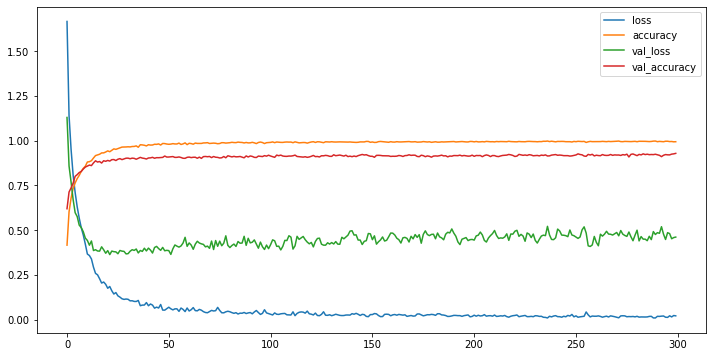

In [36]:
# Plot results
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()